In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = "C:/Users/raman/Downloads/transformed_ebay_data.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0  num__Price  num__Feedback Score  cat__Listing Type_Auction  \
0           0   -0.072931            -0.302147                        0.0   
1           1   -0.064066            -0.302491                        0.0   
2           2   -0.064802            -0.303912                        0.0   
3           3   -0.070170             3.955687                        0.0   
4           4   -0.029952            -0.297746                        0.0   

   cat__Listing Type_AuctionWithBIN  cat__Listing Type_FixedPrice  \
0                               1.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   cat__Listing Type_StoreInventory  cat__Shipping Type_Calculated  \
0                               0.0                 

In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
# Example: Convert binary columns back to category labels
binary_columns = [
    'cat__Listing Type_Auction', 'cat__Listing Type_AuctionWithBIN',
    'cat__Listing Type_FixedPrice', 'cat__Listing Type_StoreInventory',
    'cat__Shipping Type_Calculated',
    'cat__Shipping Type_CalculatedDomesticFlatInternational',
    'cat__Shipping Type_Flat',
    'cat__Shipping Type_FlatDomesticCalculatedInternational',
    'remainder__Store URL_flag',
    'remainder__Large Image URL_flag',
    'remainder__Super Size Image URL_flag',
    'remainder__Exchange_rate'
]

# Example: Convert 1s and 0s to the actual label if needed (example for 'cat__Listing Type_Auction')
df['cat__Listing Type_Auction'] = df['cat__Listing Type_Auction'].map({1: 'Auction', 0: 'Not Auction'})


In [4]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Example: Fill NaN values with a placeholder or mean
df['cat__Condition_nan'].fillna('Unknown', inplace=True)

remainder__Shipping Cost           25977
remainder__Store Name              21729
remainder__Store URL               21729
remainder__Gallery URL              1389
remainder__Large Image URL          5078
remainder__Super Size Image URL     5078
dtype: int64


C:\Users\raman\AppData\Local\Temp\ipykernel_32944\3059908293.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cat__Condition_nan'].fillna('Unknown', inplace=True)


In [5]:
# Inspect the first few rows of the dataframe
print(df.head())

# Get summary statistics for numerical columns
print(df.describe())

# Check the data types of all columns
print(df.dtypes)


   num__Price  num__Feedback Score cat__Listing Type_Auction  \
0   -0.072931            -0.302147               Not Auction   
1   -0.064066            -0.302491               Not Auction   
2   -0.064802            -0.303912               Not Auction   
3   -0.070170             3.955687               Not Auction   
4   -0.029952            -0.297746               Not Auction   

   cat__Listing Type_AuctionWithBIN  cat__Listing Type_FixedPrice  \
0                               1.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   cat__Listing Type_StoreInventory  cat__Shipping Type_Calculated  \
0                               0.0                            1.0   
1                               0.0                         

In [8]:
#Insight_2
# Group by shipping type and calculate the average price
shipping_price = df.groupby(['cat__Shipping Type_Free', 
                             'cat__Shipping Type_Flat', 
                             'cat__Shipping Type_Calculated'])['num__Price'].mean().reset_index()

# Display the average prices by shipping type
print(shipping_price)


   cat__Shipping Type_Free  cat__Shipping Type_Flat  \
0                      0.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      1.0   
3                      1.0                      0.0   

   cat__Shipping Type_Calculated  num__Price  
0                            0.0    0.039940  
1                            1.0   -0.021516  
2                            0.0   -0.023810  
3                            0.0    0.015324  


C:\Users\raman\AppData\Local\Temp\ipykernel_32944\2840815803.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cat__Shipping Type_Free', y='num__Price', data=shipping_price, palette='viridis')
C:\Users\raman\AppData\Local\Temp\ipykernel_32944\2840815803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cat__Shipping Type_Flat', y='num__Price', data=shipping_price, palette='plasma')
C:\Users\raman\AppData\Local\Temp\ipykernel_32944\2840815803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cat__Shipping Type_Calculated', y='n

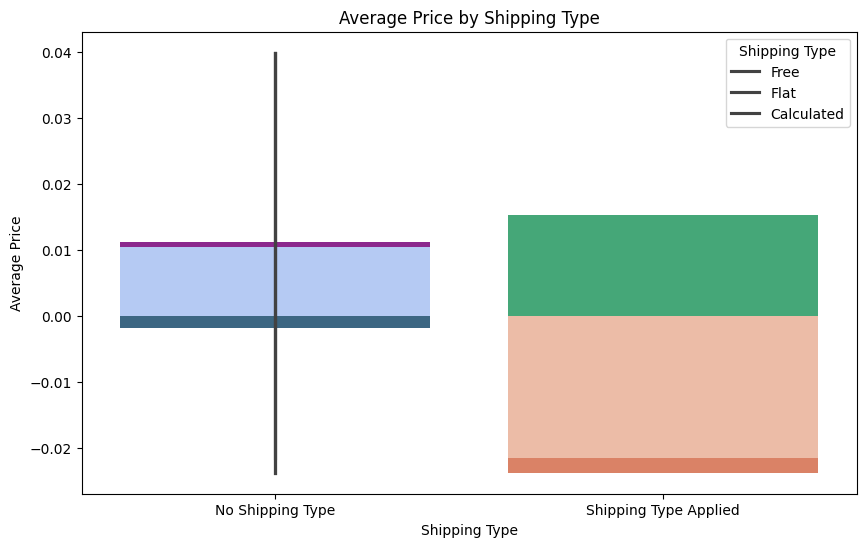

In [9]:
# visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a bar plot for average price by shipping type
plt.figure(figsize=(10, 6))
sns.barplot(x='cat__Shipping Type_Free', y='num__Price', data=shipping_price, palette='viridis')
sns.barplot(x='cat__Shipping Type_Flat', y='num__Price', data=shipping_price, palette='plasma')
sns.barplot(x='cat__Shipping Type_Calculated', y='num__Price', data=shipping_price, palette='coolwarm')

plt.title('Average Price by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['No Shipping Type', 'Shipping Type Applied'])
plt.legend(title='Shipping Type', labels=['Free', 'Flat', 'Calculated'])
plt.show()

